## Employee Salary Determinants Analysis
This project explores the various factors that shape an employee's earning potential, delving into the key determinants, such as education level, job role, experience etc. By analyzing these elements, we aim to uncover valuable insights and offer actionable recommendations to help employees enhance their earning potential.


We will answer the following research questions:
1. Which age group has the highest median salary?
2. Which gender has the highest median salary?
3. Which education Level commands the highest median salary?
4. Which job role earns the highest median salary?
5. What is the prevalent education level among the top earning professionals?
6. Are there any correlations between Age, Salary and working experience?


We will beign our analysis by import the required libraries

In [120]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# load the data into pandas dataframe
salary_data = pd.read_csv('Salary_Data.csv')

In [122]:
# Get the five rows of the dataframe
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [123]:
# Get the last five rows of the dataframe
salary_data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [124]:
# Show basic info about the dataframe
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [125]:
# Show the shape of the dataframe
salary_data.shape

(6704, 6)

In [126]:
# Show the summary statistics of the dataframe
salary_data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


To ensure the data is accurate and reliable, we will conduct a thorough check on the dataframe. This involves looking for any missing values or duplicate entries. If we find any issues, we'll take the necessary steps to fix them, making sure the data is trustworthy

In [127]:
# Inspect the dataframe for missing values
salary_data.isnull().any()

Age                    True
Gender                 True
Education Level        True
Job Title              True
Years of Experience    True
Salary                 True
dtype: bool

In [128]:
# Display the missing values for examination
salary_data[salary_data['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


From the above operations, it is certain that the dataframe contains missing values.

In [129]:
# Check the dataframe for duplicate entries
salary_data.duplicated().any()

True

The operation above confirms the presence of duplicate entries in the dataframe

Now that we've identified both missing values and duplicates in the dataframe, the necessary steps will be taken to address them to ensure accurate analysis

Before we start cleaning and analyzing the data, we'll make a copy of the original dataframe to protect its integrity. This copy will serve as a backup in case we encounter any data loss or accidental changes while working on the analysis.

In [130]:
# Make a copy of the data
salary_data_backup = salary_data.copy()

In [131]:
# Display the empty rows
salary_data_backup[salary_data_backup['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Drop the empty rows
salary_data_backup = salary_data_backup.drop([172, 260])

In [133]:
# Check the dataframe for missing values 
salary_data_backup.isnull().any()

Age                    False
Gender                 False
Education Level         True
Job Title              False
Years of Experience     True
Salary                  True
dtype: bool

Examining the result above, we can see that row-wise missing values have been  addressed. However, there are still column-specific missing values. We'll now address these as well.

First, we'll handle the missing values in the "salary" column

We're filling in the missing values in the 'Salary' column with the median. Using the median is a robust approach for handling missing values in salary data because it's not influenced by extreme values, which can skew other statistical measures like the mean

In [134]:
# Get the median salary
salary_data_backup['Salary'].median()

115000.0

In [135]:
# Fill in the missing values with the median 
salary_data_backup['Salary'] = salary_data_backup['Salary'].fillna(115000)
salary_data_backup.isnull().any()

Age                    False
Gender                 False
Education Level         True
Job Title              False
Years of Experience     True
Salary                 False
dtype: bool

The result above shows that the "Salary" column does not contain null anymore. Next, we'll handle the null in the "Years of Experience" and "Education"columns

In [136]:
# Get the average of the Years of Experience
avg_exp = round(salary_data_backup['Years of Experience'].mean())
avg_exp

8

In [137]:
# Fill in the missing value "Years of Experience" column with average
salary_data_backup['Years of Experience'] = salary_data_backup['Years of Experience'].fillna(avg_exp)
salary_data_backup.isnull().any()

Age                    False
Gender                 False
Education Level         True
Job Title              False
Years of Experience    False
Salary                 False
dtype: bool

We'll fill in the missing values in the "Education Level" column with the mode. Since 'Education Level' is a categorical variable, using the mode is a common practice to handle missing values in categorical data. The mode represents the most frequently occurring value in the column, making it a suitable choice for imputing missing values in this context.

In [138]:
# Get the mode of the "Education Level"
edu_mode = salary_data_backup['Education Level'].mode()
edu_mode

0    Bachelor's Degree
dtype: object

In [139]:
# Fill in the missing value in the "Education Level" with the mode
salary_data_backup['Education Level'] = salary_data_backup['Education Level'].fillna("Bachelor's Degree")
salary_data_backup.isnull().any()

Age                    False
Gender                 False
Education Level        False
Job Title              False
Years of Experience    False
Salary                 False
dtype: bool

The result of the operation above shows that the dataframe no longer contains missing values. The next thing we will do is to handle the duplicate entries in the dataframe`

In [140]:
# Check the dataframe for duplicates
salary_data_backup.duplicated().sum()

4911

In [141]:
# Drop the duplicates from the dataframe
salary_data_backup = salary_data_backup.drop_duplicates()
salary_data_backup.duplicated().sum() # check the dataframe for duplicates

0

The result of the operation above confirms that there are no duplicate entries in the dataframe. Therefore we can proceed with our analysis.

Next, as part of our data cleaning steps, we'll check for outliers in the numerical columns namely the "Age", "Salary" and "Years of Experience" columns

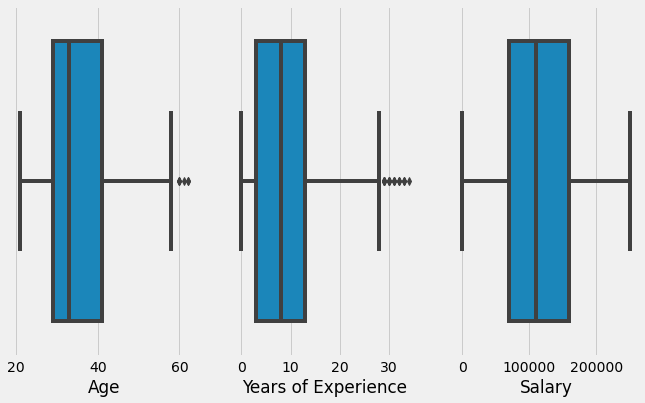

In [142]:
# Check the aforementioned columns for the outliers
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
sns.boxplot(data=salary_data_backup, x='Age', ax=ax[0])
sns.boxplot(data=salary_data_backup, x='Years of Experience', ax=ax[1])
sns.boxplot(data=salary_data_backup, x='Salary', ax=ax[2]);

The presence of outliers in the 'Age' and 'Years of Experience' columns is expected in real-world employee data. With a minimum age of 21 and a maximum of 62, these extreme values are considered valid as they reflect the diversity of employee ages. Similarly, outliers indicating 30 or more years of experience are common in the workforce, making them relevant and valid data points

While reviewing the data, I noticed that the  'Education Level' column contains duplicates for the same education levels, like 'Bachelor's' and 'Bachelor's Degree', etc. To ensure data consistency, we will standardize these representations. Here's a visual representation of the issue:

In [143]:
# Get the unique values in the 'Education level' column
salary_data_backup['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [144]:
# Standardize the values in the 'Education Level' column 
salary_data_backup['Qualification'] = salary_data_backup['Education Level'].apply(
lambda x: "Bachelor's" if x =="Bachelor's Degree" else("Master's" if x == "Master's Degree" else('PhD' if x == 'phD' else x)))

In [145]:
# Get the unique values in the 'Qualification' column
salary_data_backup['Qualification'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

To maintain data clarity and avoid redundancy, we have opted to remove the 'Education Level' column, ensuring a more streamlined and informative dataset.

In [146]:
# Drop the 'Education Level' column
salary_data_backup = salary_data_backup.drop('Education Level', axis=1)

Now, We can begin answering our research questions

**QUESTION 1:** Which age group has the highest median salary?

First, we have to create an 'age group' column 

In [147]:
# Create an 'Age Group' column
bin_edges = [21, 31, 41, 51, 63] # Create the bin edges
labels = ['21-30', '31-40', '41-50', '51-62'] # Create the labels for the bin edges
salary_data_backup['Age_Group'] = pd.cut(salary_data_backup['Age'], bins=bin_edges, labels=labels, include_lowest=True, right=False)
salary_data_backup.head()

,Age,Gender,Job Title,Years of Experience,Salary,Qualification,Age_Group
0,32.0,Male,Software Engineer,5.0,90000.0,Bachelor's,31-40
1,28.0,Female,Data Analyst,3.0,65000.0,Master's,21-30
2,45.0,Male,Senior Manager,15.0,150000.0,PhD,41-50
3,36.0,Female,Sales Associate,7.0,60000.0,Bachelor's,31-40
4,52.0,Male,Director,20.0,200000.0,Master's,51-62


In [148]:
# Get the median salary of each age group
age_group_salary = salary_data_backup.groupby('Age_Group')['Salary'].median().reset_index(name='median_salary')
age_group_salary

,Age_Group,median_salary
0,21-30,60000.0
1,31-40,115000.0
2,41-50,167962.0
3,51-62,190000.0


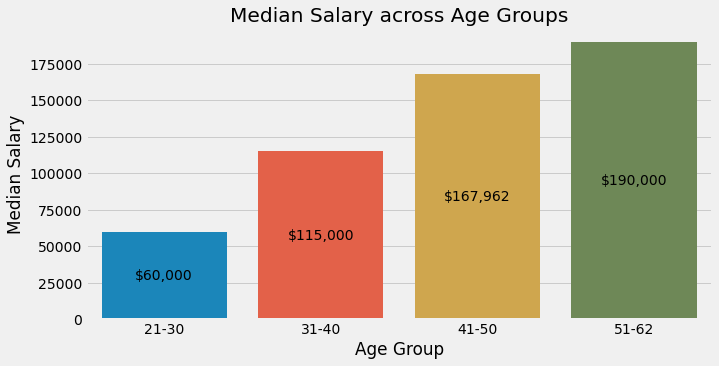

In [149]:
plt.style.use('fivethirtyeight') # Set the style for the plot
fig = plt.subplots(figsize=(10, 5)) # Set the figure size
plot1 = sns.barplot(data=age_group_salary, x='Age_Group', y='median_salary') # Plot the graph
plt.xlabel('Age Group')
plt.ylabel('Median Salary')
plt.title('Median Salary across Age Groups');

# Add data labels to the bar chart
for p in plot1.patches:   
    plot1.text(p.get_x() + p.get_width()/2, p.get_height()/2, f"${p.get_height():,.0f}", va='center', ha='center')


The analysis revealed that individual in  the **51-62** age group earn the highest median salary, amounting to **`$190,000`**. This suggests that with increasing age, empoloyees tend to earn more likely due to the accumulated experience and seniority.

**Recommendations:**

1. Employees should continue to accumulate experience and knowledge in their fields. 


2. They should also seek out opportunities for career growth and advancement, which often lead to higher earning potential over time."

**QUESTION 2:** Which gender has the highest median salary?

In [150]:
gender_salary = salary_data_backup.groupby('Gender')['Salary'].median().reset_index(name='median_salary')
gender_salary

,Gender,median_salary
0,Female,105000.0
1,Male,120000.0
2,Other,158254.0


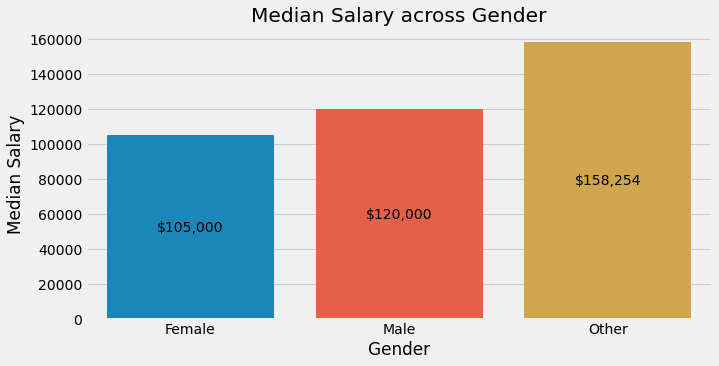

In [151]:
plt.style.use('fivethirtyeight') # Set the style for the plot
fig = plt.subplots(figsize=(10, 5)) # Set the figure size 
plot2 = sns.barplot(data=gender_salary, x='Gender', y='median_salary')
plt.xlabel('Gender')
plt.ylabel('Median Salary')
plt.title('Median Salary across Gender')

# Add data labela to the chart
for p in g.patches:
    plot2.text(p.get_x() + p.get_width()/2, p.get_height()/2, f"${p.get_height():,.0f}", va='center', ha='center')

The data shows that **male employees** command a higher median salary of **`$120,000`** compared to their **female** counterparts, who earn **$105,000**. This suggests that gender-based compensation disparities exist in the workplace.

**Recommendation:**

The Organization should adopt transparent compensation policies and actively monitor and address any gender-based pay disparities. 

**QUESTION 3:**  Which education Level commands the highest median salary?

In [152]:
# Get the median salaries of employees based on their qualifications
qualification_salary = salary_data_backup.groupby('Qualification')['Salary'].median().nlargest(10).reset_index(name='median_salary')
qualification_salary_sorted = qualification_salary.sort_values(by='median_salary', ascending=False)
qualification_salary_sorted

,Qualification,median_salary
0,PhD,170000.0
1,Master's,126916.0
2,Bachelor's,80000.0
3,High School,35000.0


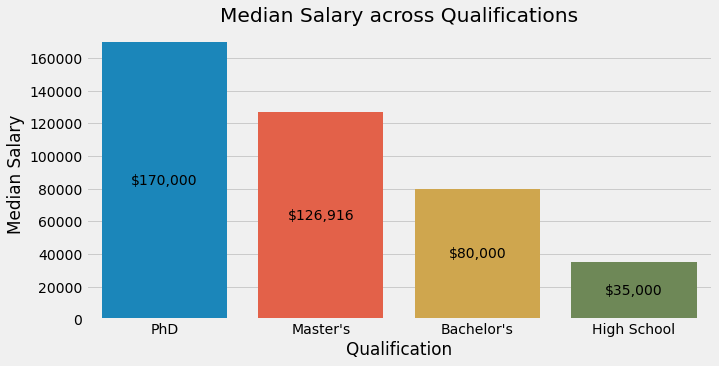

In [153]:
fig = plt.subplots(figsize=(10, 5)) # sets the figsize
plot3 = sns.barplot(data=qualification_salary_sorted, x='Qualification', y='median_salary') # Creates a bar chart
plt.xlabel('Qualification')
plt.ylabel('Median Salary')
plt.title('Median Salary across Qualifications')

# Add data lebels to the chart
for p in plot3.patches:
    plot3.text(p.get_x() + p.get_width()/2, p.get_height()/2, f"${p.get_height():,.0f}", va='center', ha='center')

The data reveals that individuals with advanced degrees, including doctoral and master's degrees command the highest median salaryies. This highlights the potential salary benefits of acquiring these qualifications.

**Recommendation:**

Employees should consider pursuing advanced degrees to boost their earning potential in today's competitive job market.

**QUESTION 4:** Which job role earns the highest median salary?

In [154]:
# Get the top 10 highest paid employees
employee_salary = salary_data_backup.groupby('Job Title')['Salary'].median().nlargest(10).reset_index(name='median_salary')
employee_salary

,Job Title,median_salary
0,CEO,250000.0
1,Chief Technology Officer,250000.0
2,Chief Data Officer,220000.0
3,Director of Data Science,210000.0
4,Director,200000.0
5,VP of Finance,200000.0
6,Operations Director,190000.0
7,VP of Operations,190000.0
8,Director of Human Resources,187500.0
9,Software Engineer Manager,180958.0


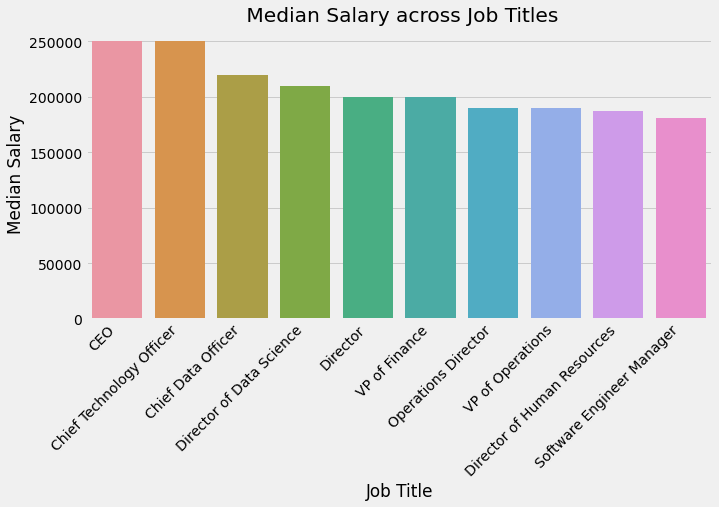

In [155]:
fig = plt.subplots(figsize=(10, 5)) # Sets the figure size 
plot4 = sns.barplot(data=employee_salary, x='Job Title', y='median_salary') # Creates a bar chart
plt.xlabel('Job Title')
plot4.set_xticklabels(plot4.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Median Salary')
plt.title(' Median Salary across Job Titles');

The analysis indicatess that CEOs and Chief Technology Officers earn the highest salaries. This pattern suggests that
Executive and Leadership roles offer the best salary opportunities.

**Recommendation:**

Employees should strive to attain top level positions to boost their earning potential.

**QUESTION 5:**  What is the prevalent education level among the top earning professionals?

In [156]:
# Get the qualifications of the top earners
top_earners_qualification = salary_data_backup.groupby(
    ['Job Title', 'Qualification'])['Salary'].median().nlargest(10).reset_index()

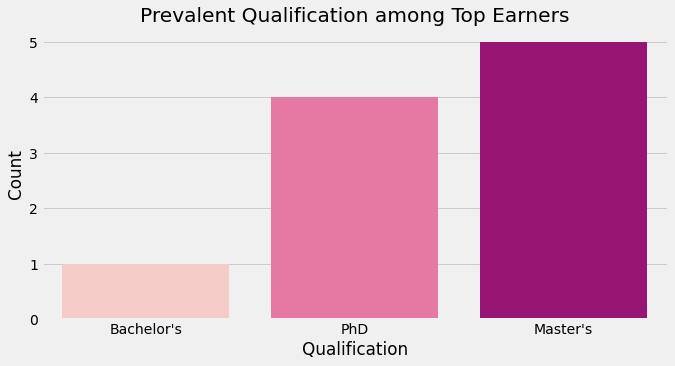

In [157]:
fig = plt.subplots(figsize=(10, 5)) # Set the figure size
plot5 = sns.countplot(data=top_earners_qualification, x='Qualification', palette='RdPu') # Create a bar chart
plt.xlabel('Qualification') 
plt.ylabel('Count')
plt.title('Prevalent Qualification among Top Earners');

The data shows that top earners predominantly hold master's and doctoral degrees. This finding indicates that advanced degrees like these often lead to higher incomes.

**Recommendation:**

Employees are encouraged to pursue advanced degrees to unlock opportunities for higher-paying positions and increase their earning potential

**QUESTION 6:**  Are there any correlations between Age, Salary and working experience?

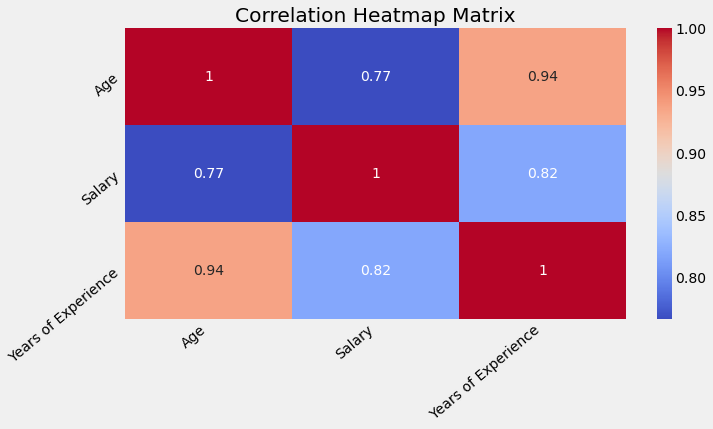

In [160]:
fig = plt.subplots(figsize=(10, 5)) # Set the figure size
corr_dataset = salary_data_backup[['Age', 'Salary', 'Years of Experience']] # Select the required columns
corr_table = corr_dataset.corr() # Create a correlation table
sns.heatmap(data=corr_table, cmap='coolwarm', annot=True) # Create a heatmap
plt.xticks(rotation= 40, ha='right') # Rotate the x-axis labels
plt.yticks(rotation=40, va='center_baseline') # Rotate the y-axis labels
plt.title('Correlation Heatmap Matrix');

From the matrix above, we can deduce the following:

1. There is a very strong correlation (r = 0.94) between age and years of experience. This underscores the premise that as individuals age, their reservoir of experience tends grows considerably.


2. Additionally, we identified a strong correlation (r = 0.82) between salary and years of experience. This suggests a trend where greater years of experience translate into higher salary prospects.


3. Furthermore, a strong correlation (r = 0.77) exists between age and salary. This trend implies that age positively influences salary, potentially owing to the accumulation of extensive professional experience and expertise over the years.


**RECOMMENDATION:**

Employees  should proactively seek opportunities to gain valuable work experience to enhance their earning potential. 


In this project, we've revealed the essential factors shaping salary prospects and offer practical recommendations. Implementing these suggestions can help individuals secure higher salaries and additional employee benefits.


Thank you for your time and attention!